<h1>Descrição sucinta do problema e da base de dados:</h1>
<h4>    • Problema: 
Queremos verificar se o algoritmo Spectral Clustering pode identificar grupos similares no dataset Iris sem utilizar rótulos.<br>
    • Dataset:
Cada instância representa uma flor da espécie Iris.<br>
    • Atributos principais:
sepal_length, sepal_width, petal_length, petal_width.
Todos os atributos são numéricos e contínuos.<br>
Existem três espécies no dataset: Iris-setosa, Iris-versicolor e Iris-virginica.<br>
    • Objetivo: 
Agrupar as flores em três clusters usando Spectral Clustering e verificar a proximidade desses clusters com as espécies reais.

<h3>Importação de Bibliotecas necessárias</h3>

In [4]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score

<h3> Importação do data frame

In [5]:
# Carregar os dados
df = pd.read_csv('Iris.csv')

In [151]:
# Visualizar as primeiras linhas do dataset
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


<h1>Análise Exploratória de Dados:</h1>
<h4>Para entender como cada variável do dataset Iris se distribui, você pode visualizar a distribuição de cada uma das variáveis (colunas) separadamente. Vamos examinar isso com gráficos como histogramas e boxplots, que ajudam a visualizar a distribuição e a variabilidade dos dados para cada característica.

<h4>1. Boxplots para cada variável:


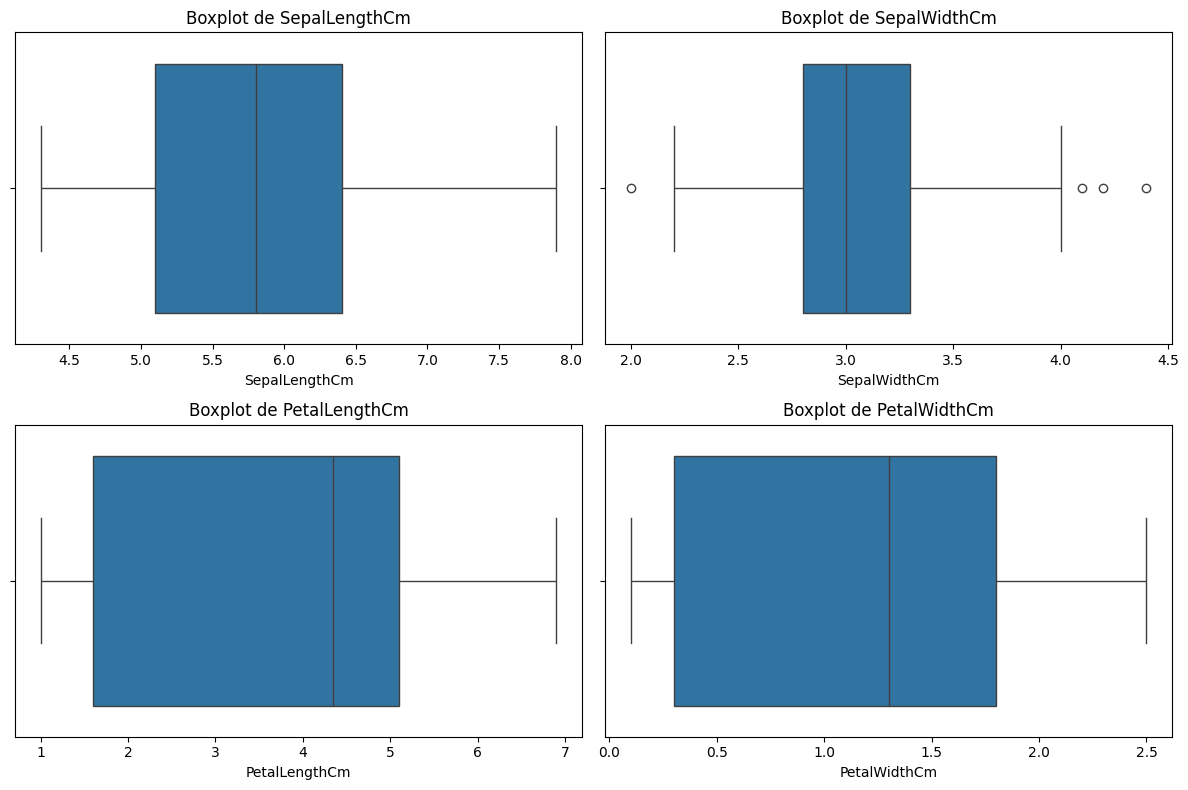

In [ ]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=iris_df[column])
    plt.title(f'Boxplot de {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()


<h4>2. Matriz de correlação entre as variáveis numéricas

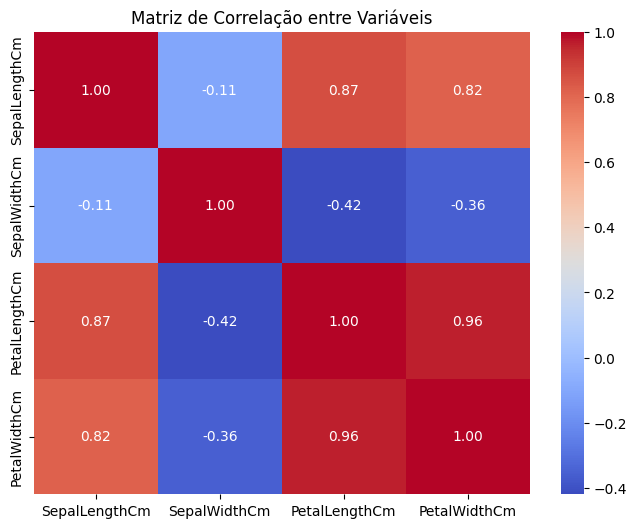

In [ ]:
plt.figure(figsize=(8, 6))
correlation_matrix = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].corr()

# Gerando o heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação entre Variáveis')
plt.show()


<h4>3. Gráficos de Insights

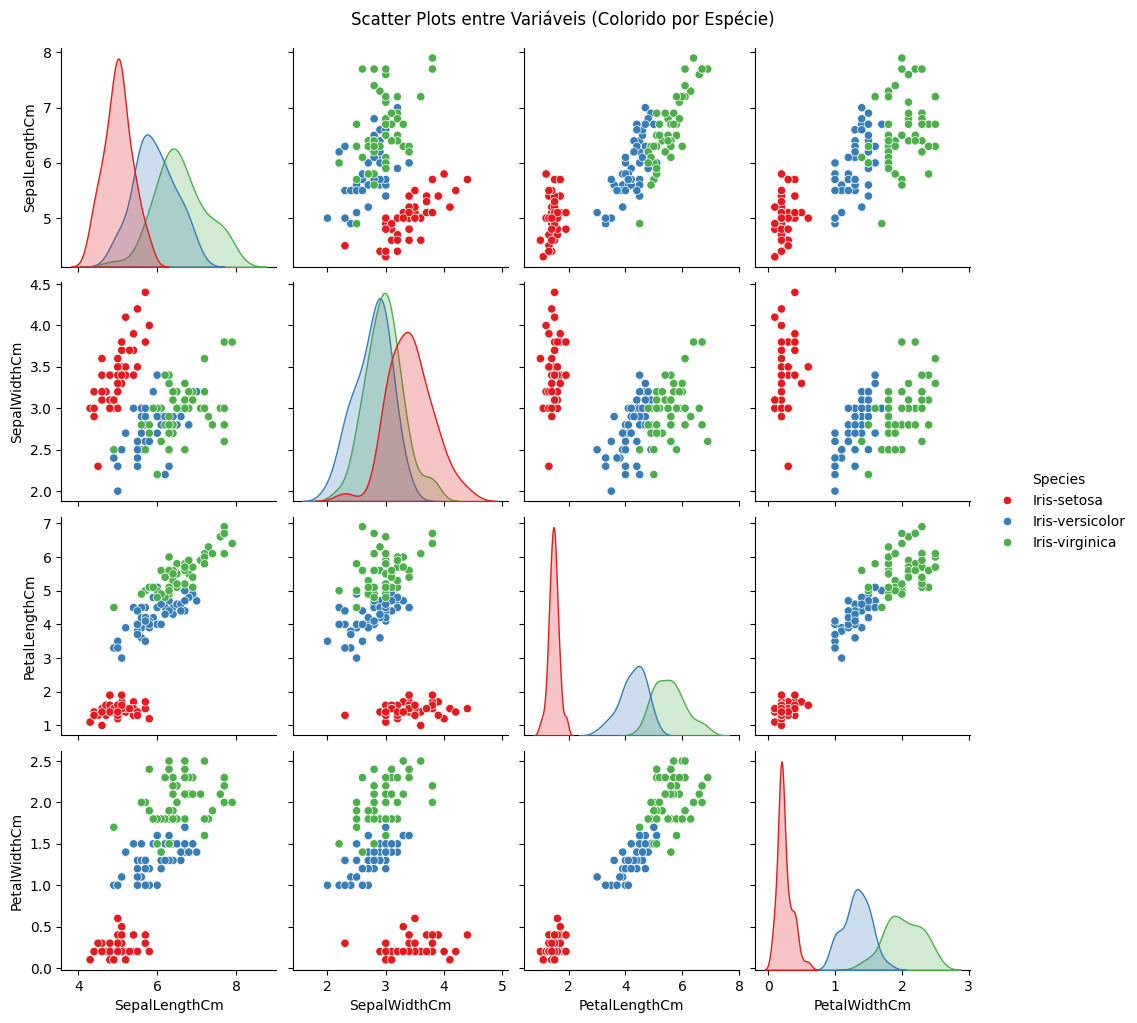

In [131]:
# Scatter plots 2D entre as variáveis
sns.pairplot(df, vars=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], hue='Species', palette='Set1')
plt.suptitle("Scatter Plots entre Variáveis (Colorido por Espécie)", y=1.02)
plt.show()


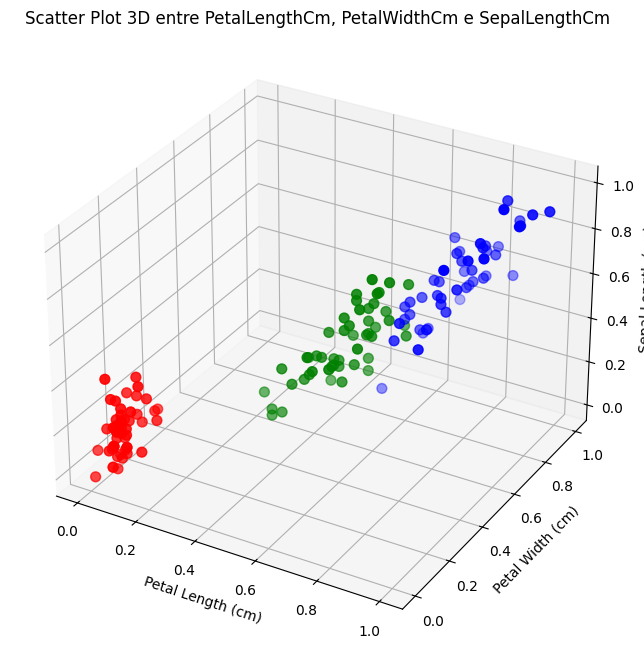

In [34]:
from mpl_toolkits.mplot3d import Axes3D

# Scatter plot 3D com três variáveis
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Mapeando cada espécie para uma cor
species_colors = {'Iris-setosa': 'r', 'Iris-versicolor': 'g', 'Iris-virginica': 'b'}
colors = df['Species'].map(species_colors)

ax.scatter(df['PetalLengthCm'], df['PetalWidthCm'], df['SepalLengthCm'], c=colors, s=50)
ax.set_xlabel('Petal Length (cm)')
ax.set_ylabel('Petal Width (cm)')
ax.set_zlabel('Sepal Length (cm)')
ax.set_title("Scatter Plot 3D entre PetalLengthCm, PetalWidthCm e SepalLengthCm")

plt.show()


<h1>Limpeza e preparação da base de dados</h1>
<h4>A limpeza e preparação de dados (data cleaning e data preparation) são etapas cruciais no processo de análise de dados, garantindo que os dados estejam prontos para serem usados nos modelos de aprendizado de máquina.

<h5>1. Remoção de duplicidade e/ou outliers

In [7]:
# Remover duplicatas
df = df.drop_duplicates()

# Verificar se houve duplicatas
print(f"Total de registros após remoção de duplicatas: {len(df)}")

Total de registros após remoção de duplicatas: 150


In [8]:
from scipy.stats import zscore

# Calcular o Z-score
z_scores = zscore(df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])

# Definir um limite de Z-score para identificar outliers
outliers = (z_scores > 3) | (z_scores < -3)

# Remover outliers
df_clean = df[~outliers.any(axis=1)]

# Verificar a remoção
print(f"Total de registros após remoção de outliers: {len(df_clean)}")


Total de registros após remoção de outliers: 149


<h5> 2. Preenchimento de dados faltantes

In [19]:
# Preencher valores faltantes com a moda de cada coluna
df = df.fillna(df.mode().iloc[0])

# Verificar se há mais valores faltantes
print(df.isnull().sum())


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


<h5>3. Feature scaling</h5>

In [21]:
from sklearn.preprocessing import MinMaxScaler

# Criar o objeto MinMaxScaler
scaler = MinMaxScaler()

# Aplicar o Min-Max scaling nas colunas numéricas
df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']] = scaler.fit_transform(df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])

# Visualizar as primeiras linhas após a normalização
print(df.head())


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1       0.222222      0.625000       0.067797      0.041667  Iris-setosa
1   2       0.166667      0.416667       0.067797      0.041667  Iris-setosa
2   3       0.111111      0.500000       0.050847      0.041667  Iris-setosa
3   4       0.083333      0.458333       0.084746      0.041667  Iris-setosa
4   5       0.194444      0.666667       0.067797      0.041667  Iris-setosa


<h5>4. Class imbalance

In [27]:
# Verificando a distribuição das classes
print(df['Species'].value_counts())


Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


<h1>Treinamento e Validação de modelos

<h5>1. Cross-Validation:</h5><br>
Indica que o modelo tem, em média, uma acurácia de 96% e é relativamente consistente, com uma pequena variação nos resultados entre os folds.

In [36]:
# Carregar o dataset Iris
data = load_iris()
X = data.data  # Variáveis de entrada
y = data.target  # Variável de saída

# Inicializar o modelo Random Forest
rf = RandomForestClassifier(random_state=42)

# Realizar a validação cruzada com 5 folds
scores = cross_val_score(rf, X, y, cv=5)  # cv=5 indica 5-fold cross-validation

# Exibir as pontuações de cada fold e a média
print("Scores de cada fold:", scores)
print("Média dos scores:", np.mean(scores))
print("Desvio padrão dos scores:", np.std(scores))


Scores de cada fold: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Média dos scores: 0.9666666666666668
Desvio padrão dos scores: 0.02108185106778919


<h5>2. Métricas consideradas para o problema

In [41]:
# Importações necessárias
from sklearn.cluster import SpectralClustering
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score

# Carregar o dataset Iris
iris = load_iris()
X = iris.data  # Os dados de entrada (features)
y_true = iris.target  # Os rótulos verdadeiros (para comparação posterior)

# Aplicando Spectral Clustering
spectral = SpectralClustering(n_clusters=3, random_state=42)  # 3 clusters para o Iris
labels = spectral.fit_predict(X)  # Rótulos gerados pela clusterização

# Calculando o Silhouette Score
score = silhouette_score(X, labels)
print(f"Silhouette Score: {score}")


Silhouette Score: 0.5553062646081594


A avaliação do Silhouette Score pode nos ajudar a perceber se há sobreajuste ou subajuste. O Silhouette Score varia entre -1 e 1. Um valor próximo de 1 indica boa separação entre os clusters e uma boa adaptação do modelo aos dados<br>

<strong>Silhouette Score Alto (>0,5):</strong> O modelo provavelmente está bem ajustado e não apresenta overfitting nem underfitting.<br>
<strong>Silhouette Score Baixo (<0,2):</strong> Pode indicar underfitting ou um número de clusters inadequado, onde o modelo não está conseguindo encontrar a estrutura dos dados.<br>
<strong>Silhouette Score Negativo:</strong> Pode indicar overfitting onde o modelo está forçando os dados a se ajustarem a clusters errados.<br>

<h5>3. Fine-tunning

In [44]:
# Lista de possíveis valores para n_clusters e affinity
n_clusters_values = [2, 3, 4, 5]  # Testar diferentes números de clusters
affinity_values = ['nearest_neighbors', 'rbf']

# Variáveis para armazenar o melhor modelo e seu score
best_score = -1
best_n_clusters = None
best_affinity = None

# Realizando o Fine-Tuning
for n_clusters in n_clusters_values:
    for affinity in affinity_values:
        spectral = SpectralClustering(n_clusters=n_clusters, affinity=affinity, random_state=42)
        labels = spectral.fit_predict(X)  # Ajusta o modelo e gera os rótulos
        
        # Calculando o Silhouette Score
        score = silhouette_score(X, labels)
        
        # Verificando se o modelo atual é o melhor
        if score > best_score:
            best_score = score
            best_n_clusters = n_clusters
            best_affinity = affinity

# Exibindo os melhores resultados
print(f"Melhor Silhouette Score: {best_score}")
print(f"Melhor número de clusters: {best_n_clusters}")
print(f"Melhor affinity: {best_affinity}")


Melhor Silhouette Score: 0.6867350732769776
Melhor número de clusters: 2
Melhor affinity: nearest_neighbors


/home/bradoke/myenv/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/home/bradoke/myenv/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/home/bradoke/myenv/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/home/bradoke/myenv/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


<h5>4. Avaliação no conjunto de teste

In [51]:
# Carregar o dataset Iris
iris = load_iris()
X = iris.data  # Dados de entrada
y = iris.target  # Rótulos reais (para comparação)

# Dividir o dataset em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melhor configuração do modelo (ajustes já feitos no fine-tuning)
best_n_clusters = 3
best_affinity = 'nearest_neighbors'

# Treinar o modelo no conjunto de treino e gerar os rótulos dos clusters
spectral = SpectralClustering(n_clusters=best_n_clusters, affinity='rbf', random_state=42)
labels_train = spectral.fit_predict(X_train)
labels_test = spectral.fit_predict(X_test)

# Avaliar a clusterização no conjunto de teste
labels_test = spectral.fit_predict(X_test)  # Aplicar no conjunto de teste

# Calcular o Silhouette Score no conjunto de teste
score = silhouette_score(X_test, labels_test)
print(f"Silhouette Score no conjunto de teste: {score}")


Silhouette Score no conjunto de teste: 0.5749429418885257


In [53]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Carregar o dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

# Criar o modelo
model = RandomForestClassifier(random_state=42)

# Definir o número de folds
k = 5

# Aplicar K-Fold Cross-Validation
scores = cross_val_score(model, X, y, cv=k)

# Exibir as métricas
print(f"Acurácias em cada fold: {scores}")
print(f"Acurácia média: {np.mean(scores):.2f} +/- {np.std(scores):.2f}")


Acurácias em cada fold: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Acurácia média: 0.97 +/- 0.02


<h5>5. Discussão sobre estratégias/ideias/sugestões para a melhoria dos modelos

1. Avaliação no Conjunto de Teste<br>

Após o treinamento do modelo, é essencial avaliar sua performance em um conjunto de dados de teste, que é um subconjunto dos dados separados previamente e não utilizado no treinamento. Isso ajuda a verificar se o modelo generaliza bem para novos dados e não está apenas "decorando" o treinamento (overfitting). Para avaliação, utilizamos métricas como Silhouette Score, que mede a coesão e separação dos clusters, ou outras métricas como Accuracy, Precision, Recall, entre outras.



2. Discussão dos Resultados<br>

Os resultados obtidos podem ser analisados com base em várias métricas, como o Silhouette Score, que foi utilizado para avaliar a qualidade da clusterização no caso do Spectral Clustering. Um Silhouette Score mais alto indica uma melhor separação entre os clusters e mais coesão dentro de cada cluster. Se o modelo apresentar score baixo, isso pode indicar que os clusters não estão bem definidos e o modelo pode não estar funcionando de forma ideal.

3. Melhorias nos Modelos
Para melhorar o modelo, podemos:

Ajustar parâmetros como o número de clusters, que pode ajudar o modelo a entender melhor os dados.
Testar outros modelos de clustering, caso o escolhido não dê bons resultados.
Trabalhar melhor nos dados, ajustando problemas como valores faltantes ou dados muito dispersos, para que o modelo aprenda melhor.